# Titanic

In [4]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

In [14]:
df_train = pd.read_csv('ttrain.csv')
df_test = pd.read_csv('ttest.csv')

In [6]:
# EDA - Train & Test

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_train.shape

(891, 12)

In [18]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_test.shape

(418, 11)

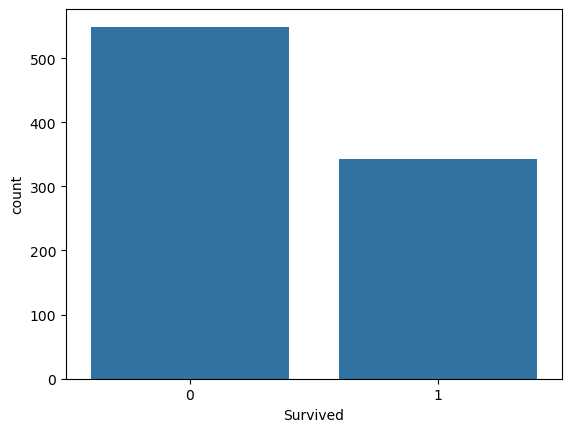

In [22]:
sns.countplot(x=df_train['Survived']);

In [24]:
# combine test and train data
df_test['Survived'] = None

# Concatenate train and test data along rows
df=pd.concat([df_train,df_test],ignore_index=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,None,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [26]:
#EDA

In [30]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [36]:
df.describe().T #Transpoze

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [34]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Visualization

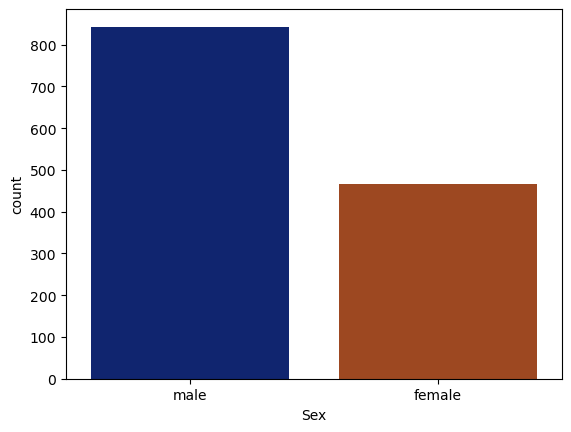

In [39]:
sns.countplot(x=df["Sex"],palette="dark");

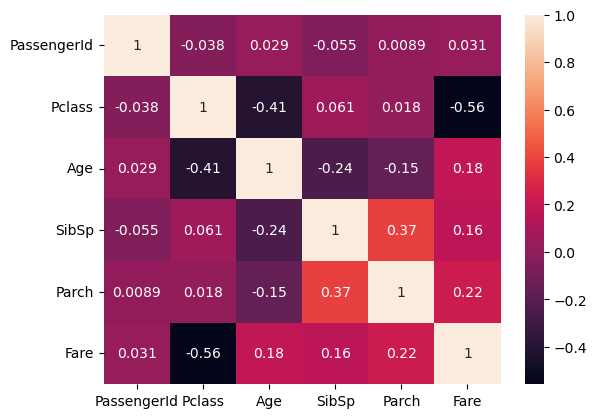

In [41]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

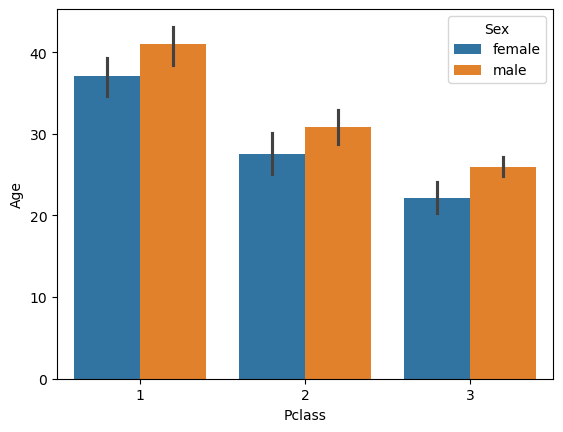

In [43]:
sns.barplot(x ='Pclass', y = 'Age', hue = 'Sex', data = df);

### Feature Engineering

In [48]:
df["Title"]=df["Name"].str.extract(' ([A-Za-z]+)\\.',expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [57]:
# Fills missing values in the Age column with the average age of each Title group.
df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'),inplace=True)
                
# Fills missing values in the Fare column with the overall mean of the Fare column.
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
                 
#Fills missing values in the Embarked column with the most common value, S.
df['Embarked'].fillna('S',inplace=True)

In [65]:
# Creates a new FamilySize column that represents the total number of family members, including the passenger.
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Creates an IsAlone column that assigns 1 if the passenger is alone and 0 if they are traveling with family.
df['IsAlone'] = np.where(df['FamilySize'] > 1, 0, 1)

In [67]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
967,968,None,3,"Miles, Mr. Frank",male,32.811056,0,0,359306,8.0500,NaN,S,Mr,1,1
1161,1162,None,1,"McCaffry, Mr. Thomas Francis",male,46.000000,0,0,13050,75.2417,C6,C,Mr,1,1
1017,1018,None,3,"Brobeck, Mr. Karl Rudolf",male,22.000000,0,0,350045,7.7958,NaN,S,Mr,1,1
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.000000,0,0,347071,7.7750,NaN,S,Miss,1,1
974,975,None,3,"Demetri, Mr. Marinko",male,32.811056,0,0,349238,7.8958,NaN,S,Mr,1,1
1060,1061,None,3,"Hellstrom, Miss. Hilda Maria",female,22.000000,0,0,7548,8.9625,NaN,S,Miss,1,1
972,973,None,1,"Straus, Mr. Isidor",male,67.000000,1,0,PC 17483,221.7792,C55 C57,S,Mr,2,0
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.000000,2,0,PC 17611,133.6500,NaN,S,Mr,3,0
1129,1130,None,2,"Hiltunen, Miss. Marta",female,18.000000,1,1,250650,13.0000,NaN,S,Miss,3,0
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.000000,0,0,PC 17482,49.5042,C90,C,Miss,1,1


### Modelling

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


#lightboost da eklenebilir
def classification_test(x,y,confusion_mtr=False,classification_rpt=False):
    # Butun Modelleri tanimliyorum
    g=GaussianNB()
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    k=KNeighborsClassifier()
    
    algos=[g,b,l,d,rf,h,k]
    algo_names=['Gaussian NB','Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','KNeighbors Classifier']

    accuracy=[]
    confusion=[]
    classification=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    # Hata ve dogruluk oranlarini bir tablo haline getirmek icin bir dataframe olusturuyorum
    result=pd.DataFrame(columns=['Accuracy Score','Confusion Matrix','Classification Report'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test,p))
        confusion.append(confusion_matrix(y_test,p)**0.5)
        classification.append(classification_report(y_test,p))

    # result adli tabloya dogruluk ve hata oranlarini yerlestiriyorum
    result['Accuracy Score']=accuracy
    result['Confusion Matrix']=confusion
    result['Classification Report']=classification

    # olusturdugun result tablosunu dogruluk oranina (r2_score) gore siralayip donuyor
    r_table=result.sort_values('Accuracy Score',ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
                confusion_mat = np.array(row['Confusion Matrix'])
                print(f"Confusion Matrix of {index}")
                plt.figure(figsize=(3,2))
                sns.heatmap(confusion_mat,annot=True)
                plt.show()
    if classification_rpt:
        for index, row in r_table.iterrows():
                print(f"Classification Report of {index}:")
                print(row['Classification Report'])

        
    return r_table[['Accuracy Score']]

In [72]:
x = df.drop(['Survived','PassengerId','Name','Cabin','Ticket'],axis=1)
y = df[["Survived"]]

In [76]:
x=pd.get_dummies(x,drop_first=True)
x.sample(5)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
92,1,46.000000,1,0,61.1750,2,0,True,False,True,False,True,False
648,3,32.811056,0,0,7.5500,1,1,True,False,True,False,True,False
207,3,26.000000,0,0,18.7875,1,1,True,False,False,False,True,False
749,3,31.000000,0,0,7.7500,1,1,True,True,False,False,True,False
922,2,24.000000,2,0,31.5000,3,0,True,False,True,False,True,False


In [78]:
x_train=x[:891]
x_test=x[891:]
y_train=y[:891].astype(float)
y_test=y[891:]
y_train.dtypes

Survived    float64
dtype: object

In [82]:
classification_test(x_train, y_train)

,Accuracy Score
Random Forest Classifier,0.837989
Gradient Boosting Classifier,0.821229
Logistic Regression,0.810056
Decision Tree Classifier,0.810056
Gaussian NB,0.782123
Bernoulli NB,0.782123
KNeighbors Classifier,0.731844


Confusion Matrix of Random Forest Classifier


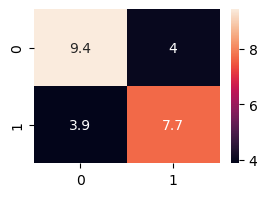

Confusion Matrix of Gradient Boosting Classifier


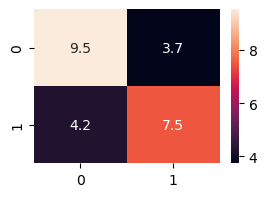

Confusion Matrix of Logistic Regression


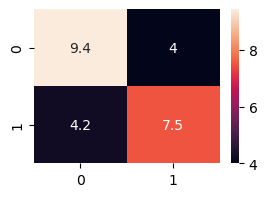

Confusion Matrix of Decision Tree Classifier


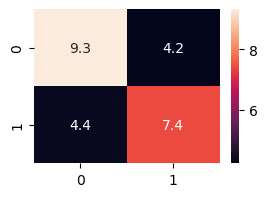

Confusion Matrix of Gaussian NB


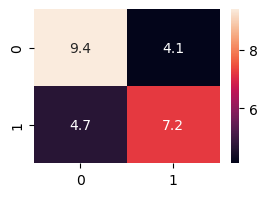

Confusion Matrix of Bernoulli NB


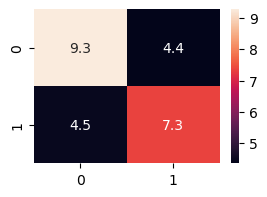

Confusion Matrix of KNeighbors Classifier


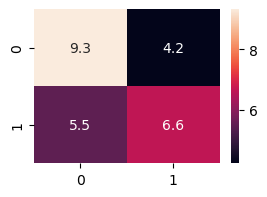

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       105
         1.0       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       105
         1.0       0.78      0.76      0.77        74

    accuracy                  

,Accuracy Score
Random Forest Classifier,0.826816
Gradient Boosting Classifier,0.821229
Logistic Regression,0.810056
Decision Tree Classifier,0.793296
Gaussian NB,0.782123
Bernoulli NB,0.782123
KNeighbors Classifier,0.731844


In [84]:
classification_test(x_train,y_train,confusion_mtr=True,classification_rpt=True)

In [86]:
l=LogisticRegression()
model=l.fit(x_train,y_train)
predictions=model.predict(x_test)
predictions

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [88]:
submission = pd.DataFrame({
    'PassengerId': df[891:]['PassengerId'],  
    'Survived': predictions.astype(int)       
})
submission

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [90]:
submission.to_csv('submission.csv', index=False)